# [BAT512] Advanced Data Mining with AI <br/><br/> 10주차(8강) 실습자료

- 라이브러리 임포트

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset 
from torch.utils.data import DataLoader 

## 데이터

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import random_split

In [134]:
MNIST_train_valid = datasets.MNIST(root="../data/", # 다운로드 경로 지정
                             train=True, # 훈련 데이터
                             transform=transforms.ToTensor(), # 텐서로 변환
                             download=True)

MNIST_train, MNIST_valid = random_split(MNIST_train_valid, [50000, 10000])

MNIST_test = datasets.MNIST(root="../data/", # 다운로드 경로 지정
                             train=True, # 훈련 데이터
                             transform=transforms.ToTensor(), # 텐서로 변환
                             download=True)

MNIST_test, _ = random_split(MNIST_test, [1000, 59000])

데이터 확인

In [112]:
X_sample, y_sample = MNIST_train.__getitem__(0)

In [113]:
print(X_sample)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

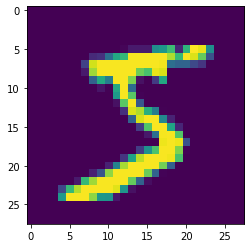

In [114]:
plt.imshow(X_sample.squeeze())
plt.show()

In [20]:
print(y_sample)

3


데이터 로더 구축

In [139]:
batch_size = 32
train_loader = DataLoader(dataset=MNIST_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

valid_loader = DataLoader(dataset=MNIST_valid,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

test_loader = DataLoader(dataset=MNIST_test,
                         batch_size=len(MNIST_test),
                         shuffle=True,
                         drop_last=False)

## CNN 모델 구축

### CNN 모델에 대한 PyTorch 클래스 선언

In [103]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()        
        
        # 첫 번째 계층(Conv1+Pool1)
        # 입력 데이터: (?, 28, 28, 1)
        #    Conv1 -> (?, 28, 28, 32)
        #    MaxPool1 -> (?, 14, 14, 32)
        self.layer_1 = nn.Sequential(
                nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2))
        
        # 두 번째 계층(Conv2+Pool2)
        # 입력 데이터: (?, 14, 14, 32)
        #    Conv2 -> (?, 14, 14, 64)
        #    MaxPool2 -> (?, 7, 7, 64)
        self.layer_2 = nn.Sequential(
                nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2))
        
        n_flatten = 7 * 7 * 64 # 일렬로 펴져서 완전연결층에 전달되는 벡터의 크기
        
        # 세 번째 계층(fully-connected)
        # 입력 데이터: (?, 7*7*64)
        #     fc1 -> (?, 16)
        #     fc2 -> (?, 10)
        self.FC_layer = nn.Sequential(
                nn.Linear(n_flatten, 16),
                nn.Linear(16, 10))

    def forward(self, x):
        hidden = self.layer_1(x)
        hidden = self.layer_2(hidden)
        flattened = self.Flatten(hidden) # 일렬로 펴는 작업
        out = self.FC_layer(flattened)
        return out
    
    def Flatten(self, inputs):
        shapes = inputs.size(1) * inputs.size(2) * inputs.size(3)
        outputs = inputs.view(inputs.size(0), shapes)
        
        return outputs

### CNN 모델 구축

In [104]:
model = CNN()

In [105]:
print(model)

CNN(
  (layer_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (FC_layer): Sequential(
    (0): Linear(in_features=3136, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=10, bias=True)
  )
)


In [106]:
print("총 파라미터 수: ",sum(p.numel() for p in model.parameters()))
# 

총 파라미터 수:  69178


## 모델 학습

### 모델 학습 수행 함수 선언

In [122]:
def run_epoch(model, data_loader, criterion, optimizer, train=False):
    loss_ep = 0
    if train:
        model.train()
    else:
        model.eval()

    for x, y in data_loader:
        if train:
            y_predicted = model(x)
            loss = criterion(y_predicted, y)
            loss_ep += loss.item()
            loss.backward()
            optimizer.step()
        else:
            with torch.autograd.no_grad():
                y_predicted = model(x)
                loss = criterion(y_predicted, y)
                loss_ep += loss.item()

        return loss_ep

### 하이퍼파라미터 및 학습 방식 정의

In [129]:
learning_rate = 1e-5
max_epochs = 2000

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### 모델 학습 진행

In [130]:
for epoch in range(1, max_epochs+1):
    train_loss = run_epoch(model, train_loader, criterion, optimizer, train=True)
    valid_loss = run_epoch(model, valid_loader, criterion, optimizer, train=False)

    if epoch % 100 == 0:
        print("epoch:{}, train_loss: {:.4f}, valid_loss: {:.4f}".format(epoch, train_loss, valid_loss))

epoch:100, train_loss: 0.4543, valid_loss: 0.7501
epoch:200, train_loss: 0.7149, valid_loss: 0.6387
epoch:300, train_loss: 0.6366, valid_loss: 0.8894
epoch:400, train_loss: 0.9635, valid_loss: 0.5735
epoch:500, train_loss: 0.7574, valid_loss: 0.5627
epoch:600, train_loss: 0.6891, valid_loss: 0.4668
epoch:700, train_loss: 0.4251, valid_loss: 0.5812
epoch:800, train_loss: 0.5858, valid_loss: 0.3584
epoch:900, train_loss: 0.5996, valid_loss: 0.4581
epoch:1000, train_loss: 0.4473, valid_loss: 0.3105
epoch:1100, train_loss: 0.3760, valid_loss: 0.5335
epoch:1200, train_loss: 0.5955, valid_loss: 0.4138
epoch:1300, train_loss: 0.5503, valid_loss: 0.2397
epoch:1400, train_loss: 0.2924, valid_loss: 0.4946
epoch:1500, train_loss: 0.3677, valid_loss: 0.5927
epoch:1600, train_loss: 0.4334, valid_loss: 0.2604
epoch:1700, train_loss: 0.5325, valid_loss: 0.8645
epoch:1800, train_loss: 0.1643, valid_loss: 0.9355
epoch:1900, train_loss: 0.5835, valid_loss: 0.4711
epoch:2000, train_loss: 0.4758, valid_lo

## 모델 검증

In [175]:
X_test_sample, y_test_sample = MNIST_test.__getitem__(10)

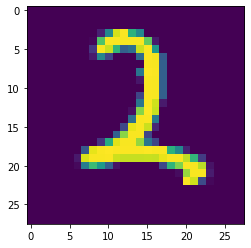

In [181]:
plt.imshow(X_test_sample.squeeze())
plt.show()

In [176]:
print(X_test_sample.shape)

torch.Size([1, 28, 28])


In [177]:
y_test_sample_pred = model(X_test_sample.unsqueeze(0))
print(y_test_sample_pred)

tensor([[ -8.9974,   1.0222,  21.4240,   2.5264, -10.6190, -12.4076,   7.7268,
         -20.5791,  -1.4470, -19.9397]], grad_fn=<AddmmBackward0>)


In [178]:
torch.argmax(y_test_sample_pred, axis=1)

tensor([2])

In [180]:
y_test_sample

2

In [157]:
from sklearn.metrics import classification_report

In [163]:
with torch.no_grad(): # 학습(가중치 업데이트)을 진행하지 않음
    X_test, y_test = next(iter(test_loader))
    
    y_test_pred = model(X_test)
    y_test_pred = torch.argmax(y_test_pred, axis=1)

In [164]:
y_test = y_test.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [172]:
report = classification_report(y_test, y_test_pred, target_names=np.arange(10).astype(str))

In [174]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       107
           1       0.94      1.00      0.97       118
           2       0.91      0.84      0.87        97
           3       0.87      0.84      0.85       108
           4       0.79      0.95      0.86       102
           5       0.90      0.79      0.84        72
           6       0.91      0.90      0.90       106
           7       0.81      0.93      0.87       105
           8       0.85      0.79      0.82        96
           9       0.91      0.71      0.80        89

    accuracy                           0.88      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.88      0.88      0.87      1000

